In [1]:
from __future__ import print_function

import sys

sys.path.extend(['/home/jorg/repository/dcnn_acdc'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm

from datetime import datetime
from pytz import timezone
import copy

import numpy as np
import torch

import numpy as np
import dill
import os
import glob
from collections import OrderedDict

from in_out.load_data import ACDC2017DataSet
from in_out.detector.detector_dataset import RegionDetectorDataSet
from config.config import config
from common.detector.config import config_detector
from plotting.color_maps import transparent_cmap
from utils.exper_hdl_ensemble import ExperHandlerEnsemble
from common.dslices.config import config
from common.detector.box_utils import find_bbox_object, BoundingBox
from utils.detector.batch_handler import BatchHandler
from utils.detector.experiment import Experiment
from utils.detector.exper_handler import ExperimentHandler

mycmap = transparent_cmap(plt.get_cmap('jet'))

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Constants aka fixed variables
ROOT_DIR = "/home/jorg/repository/dcnn_acdc"

# set seeds
SEED = 4325
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.enabled = True
torch.backends.cudnn.deterministic = True
np.random.seed(SEED)

# Load our baseline 
seg_exper_ensemble = ExperHandlerEnsemble(config.exper_dict_brier)

Load experiment from /home/jorg/repository/dcnn_acdc/logs/20180418_15_02_05_dcnn_mcv1_150000E_lr2e02/stats/exper_stats.dll
INFO - Experimental details extracted:: dcnn_mc p=0.10 fold=['0'] loss=brier
Load experiment from /home/jorg/repository/dcnn_acdc/logs/20180426_14_13_46_dcnn_mc_f1p01_brier_150KE_lr2e02/stats/exper_stats.dll
INFO - Experimental details extracted:: dcnn_mc p=0.10 fold=['1'] loss=brier
Load experiment from /home/jorg/repository/dcnn_acdc/logs/20180426_14_14_39_dcnn_mc_f2p01_brier_150KE_lr2e02/stats/exper_stats.dll
INFO - Experimental details extracted:: dcnn_mc p=0.10 fold=['2'] loss=brier
Load experiment from /home/jorg/repository/dcnn_acdc/logs/20180426_14_14_57_dcnn_mc_f3p01_brier_150KE_lr2e02/stats/exper_stats.dll
INFO - Experimental details extracted:: dcnn_mc p=0.10 fold=['3'] loss=brier


In [3]:
from in_out.detector.detector_dataset import create_dataset

dataset = create_dataset(seg_exper_ensemble, train_fold_id=3, quick_run=False, num_of_input_chnls=3)

INFO - Preparing experimental handlers. This may take a while. Be patient...
INFO - Ready. Loop through patient ids.


  0%|          | 0/100 [00:00<?, ?it/s]

WARNING - width >= patch_size - slice 6
WARNING - width >= patch_size - slice 7
WARNING - width >= patch_size - slice 14
WARNING - width >= patch_size - slice 15
WARNING - width >= patch_size - slice 16


  2%|▏         | 2/100 [00:00<00:17,  5.63it/s]

WARNING - width >= patch_size - slice 28
WARNING - height >= patch_size - slice 28
WARNING - width >= patch_size - slice 29
WARNING - height >= patch_size - slice 29
WARNING - width >= patch_size - slice 30
WARNING - height >= patch_size - slice 30
WARNING - width >= patch_size - slice 31
WARNING - height >= patch_size - slice 31
WARNING - width >= patch_size - slice 32
WARNING - height >= patch_size - slice 32
WARNING - width >= patch_size - slice 33
WARNING - height >= patch_size - slice 33
WARNING - width >= patch_size - slice 34
WARNING - width >= patch_size - slice 35
WARNING - width >= patch_size - slice 36
WARNING - width >= patch_size - slice 37


  3%|▎         | 3/100 [00:00<00:19,  4.96it/s]

WARNING - height >= patch_size - slice 64
WARNING - height >= patch_size - slice 65


  7%|▋         | 7/100 [00:01<00:23,  4.01it/s]

WARNING - height >= patch_size - slice 93
WARNING - height >= patch_size - slice 94
WARNING - height >= patch_size - slice 95


 23%|██▎       | 23/100 [00:10<00:34,  2.23it/s]

WARNING - width >= patch_size - slice 133
WARNING - height >= patch_size - slice 133
WARNING - width >= patch_size - slice 134
WARNING - height >= patch_size - slice 134
WARNING - width >= patch_size - slice 135
WARNING - height >= patch_size - slice 135
WARNING - width >= patch_size - slice 136
WARNING - width >= patch_size - slice 137
WARNING - width >= patch_size - slice 142
WARNING - height >= patch_size - slice 142
WARNING - width >= patch_size - slice 143
WARNING - height >= patch_size - slice 143
WARNING - width >= patch_size - slice 144
WARNING - height >= patch_size - slice 144
WARNING - width >= patch_size - slice 145
WARNING - height >= patch_size - slice 145
WARNING - width >= patch_size - slice 146
WARNING - width >= patch_size - slice 147
WARNING - width >= patch_size - slice 148


 24%|██▍       | 24/100 [00:11<00:35,  2.14it/s]

WARNING - width >= patch_size - slice 162
WARNING - height >= patch_size - slice 162
WARNING - width >= patch_size - slice 163
WARNING - width >= patch_size - slice 164


 25%|██▌       | 25/100 [00:11<00:34,  2.15it/s]

WARNING - width >= patch_size - slice 175
WARNING - width >= patch_size - slice 183
WARNING - height >= patch_size - slice 183
WARNING - width >= patch_size - slice 184
WARNING - height >= patch_size - slice 184
WARNING - width >= patch_size - slice 185
WARNING - height >= patch_size - slice 185
WARNING - width >= patch_size - slice 186
WARNING - height >= patch_size - slice 186
WARNING - width >= patch_size - slice 187


 28%|██▊       | 28/100 [00:13<00:35,  2.00it/s]

WARNING - width >= patch_size - slice 193
WARNING - width >= patch_size - slice 194
WARNING - height >= patch_size - slice 194
WARNING - width >= patch_size - slice 195
WARNING - height >= patch_size - slice 195
WARNING - width >= patch_size - slice 202
WARNING - height >= patch_size - slice 202
WARNING - width >= patch_size - slice 203
WARNING - height >= patch_size - slice 203
WARNING - width >= patch_size - slice 204
WARNING - height >= patch_size - slice 204
WARNING - width >= patch_size - slice 205
WARNING - height >= patch_size - slice 205
WARNING - width >= patch_size - slice 206
WARNING - height >= patch_size - slice 206
WARNING - width >= patch_size - slice 207
WARNING - height >= patch_size - slice 207


 29%|██▉       | 29/100 [00:14<00:35,  2.02it/s]

WARNING - width >= patch_size - slice 213
WARNING - width >= patch_size - slice 214
WARNING - width >= patch_size - slice 222
WARNING - width >= patch_size - slice 223
WARNING - width >= patch_size - slice 224


 42%|████▏     | 42/100 [00:20<00:28,  2.02it/s]

WARNING - width >= patch_size - slice 240
WARNING - height >= patch_size - slice 240
WARNING - width >= patch_size - slice 241
WARNING - height >= patch_size - slice 241
WARNING - width >= patch_size - slice 242


 43%|████▎     | 43/100 [00:21<00:28,  2.03it/s]

WARNING - width >= patch_size - slice 258
WARNING - width >= patch_size - slice 260
WARNING - width >= patch_size - slice 261


 46%|████▌     | 46/100 [00:22<00:26,  2.05it/s]

WARNING - width >= patch_size - slice 277
WARNING - width >= patch_size - slice 278
WARNING - width >= patch_size - slice 279
WARNING - width >= patch_size - slice 280


 49%|████▉     | 49/100 [00:23<00:24,  2.07it/s]

WARNING - width >= patch_size - slice 312
WARNING - width >= patch_size - slice 313
WARNING - width >= patch_size - slice 314
WARNING - width >= patch_size - slice 315


 63%|██████▎   | 63/100 [00:30<00:17,  2.08it/s]

WARNING - width >= patch_size - slice 323
WARNING - height >= patch_size - slice 323
WARNING - width >= patch_size - slice 324
WARNING - width >= patch_size - slice 330
WARNING - height >= patch_size - slice 330
WARNING - width >= patch_size - slice 331
WARNING - height >= patch_size - slice 331
WARNING - width >= patch_size - slice 332
WARNING - height >= patch_size - slice 332
WARNING - width >= patch_size - slice 333
WARNING - width >= patch_size - slice 334


 65%|██████▌   | 65/100 [00:31<00:16,  2.09it/s]

WARNING - width >= patch_size - slice 368
WARNING - width >= patch_size - slice 369
WARNING - width >= patch_size - slice 370
WARNING - width >= patch_size - slice 371


 66%|██████▌   | 66/100 [00:31<00:16,  2.08it/s]

WARNING - width >= patch_size - slice 381
WARNING - width >= patch_size - slice 382
WARNING - width >= patch_size - slice 383
WARNING - width >= patch_size - slice 389
WARNING - width >= patch_size - slice 390
WARNING - width >= patch_size - slice 391
WARNING - width >= patch_size - slice 392
WARNING - width >= patch_size - slice 393


 67%|██████▋   | 67/100 [00:31<00:15,  2.10it/s]

WARNING - width >= patch_size - slice 404
WARNING - width >= patch_size - slice 405


 91%|█████████ | 91/100 [00:46<00:04,  1.98it/s]

WARNING - width >= patch_size - slice 413
WARNING - width >= patch_size - slice 420
WARNING - width >= patch_size - slice 421
WARNING - height >= patch_size - slice 421
WARNING - width >= patch_size - slice 422
WARNING - width >= patch_size - slice 423
WARNING - width >= patch_size - slice 424
WARNING - width >= patch_size - slice 425


 94%|█████████▍| 94/100 [00:47<00:03,  1.99it/s]

WARNING - width >= patch_size - slice 455


 95%|█████████▌| 95/100 [00:47<00:02,  1.99it/s]

WARNING - width >= patch_size - slice 464
WARNING - width >= patch_size - slice 471
WARNING - width >= patch_size - slice 472
WARNING - width >= patch_size - slice 473
WARNING - width >= patch_size - slice 474


 96%|█████████▌| 96/100 [00:48<00:02,  2.00it/s]

WARNING - width >= patch_size - slice 488
WARNING - width >= patch_size - slice 489
WARNING - width >= patch_size - slice 490


100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


In [ ]:
dataset.trans_dict["patient082"]

(3, 286, 286) (286, 286)
[ 71  97 167 185]
96 88


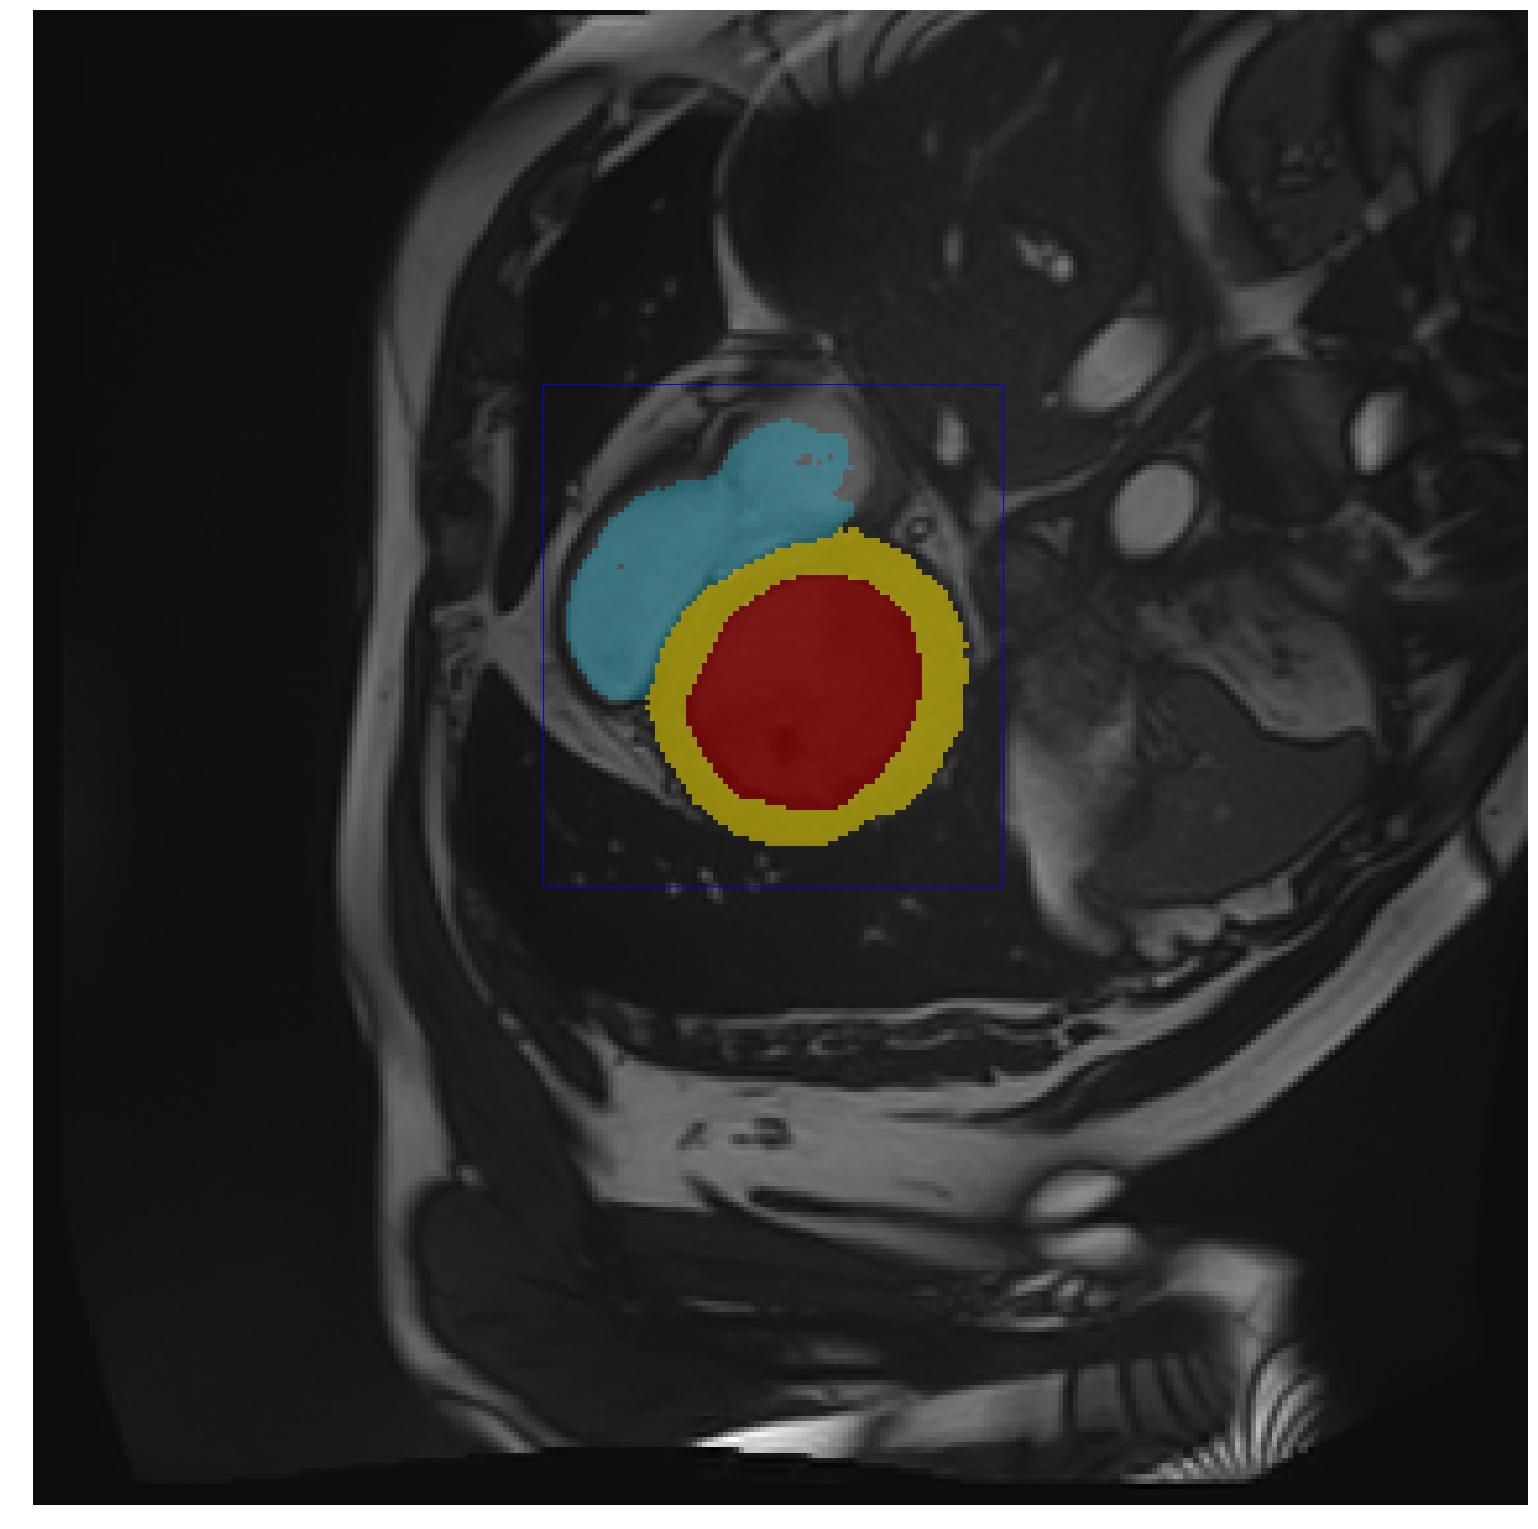

In [6]:
idx = None
for s in np.arange(len(dataset.test_labels)):
    img = dataset.test_labels[s]
    if 0 != np.count_nonzero(img):
        idx = s
    
        if idx > 25:
            break
    
idx = 133
test_img = dataset.test_images[idx]
test_lbl = dataset.test_labels[idx]
test_pred_roi = dataset.test_pred_lbl_rois[idx]
print(test_img.shape, test_lbl.shape)
print(test_pred_roi)

fig = plt.figure(figsize=(56, 50))
ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
ax1.imshow(test_img[0], cmap=cm.gray)
ax1.imshow(test_img[2], cmap=mycmap)
# ax1.imshow(test_lbl, cmap=mycmap)
# ax1.imshow(test_img[1], cmap=mycmap)
roi_box = BoundingBox.create(test_pred_roi, padding=0)
print(roi_box.width, roi_box.height)
ax1.add_patch(roi_box.get_matplotlib_patch(color='b'))

plt.axis("off")
plt.show()
# ax2 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)
# ax2.imshow(test_lbl, cmap=cm.gray)
# plt.axis("off")

[ 150.   74.  222.  146.]


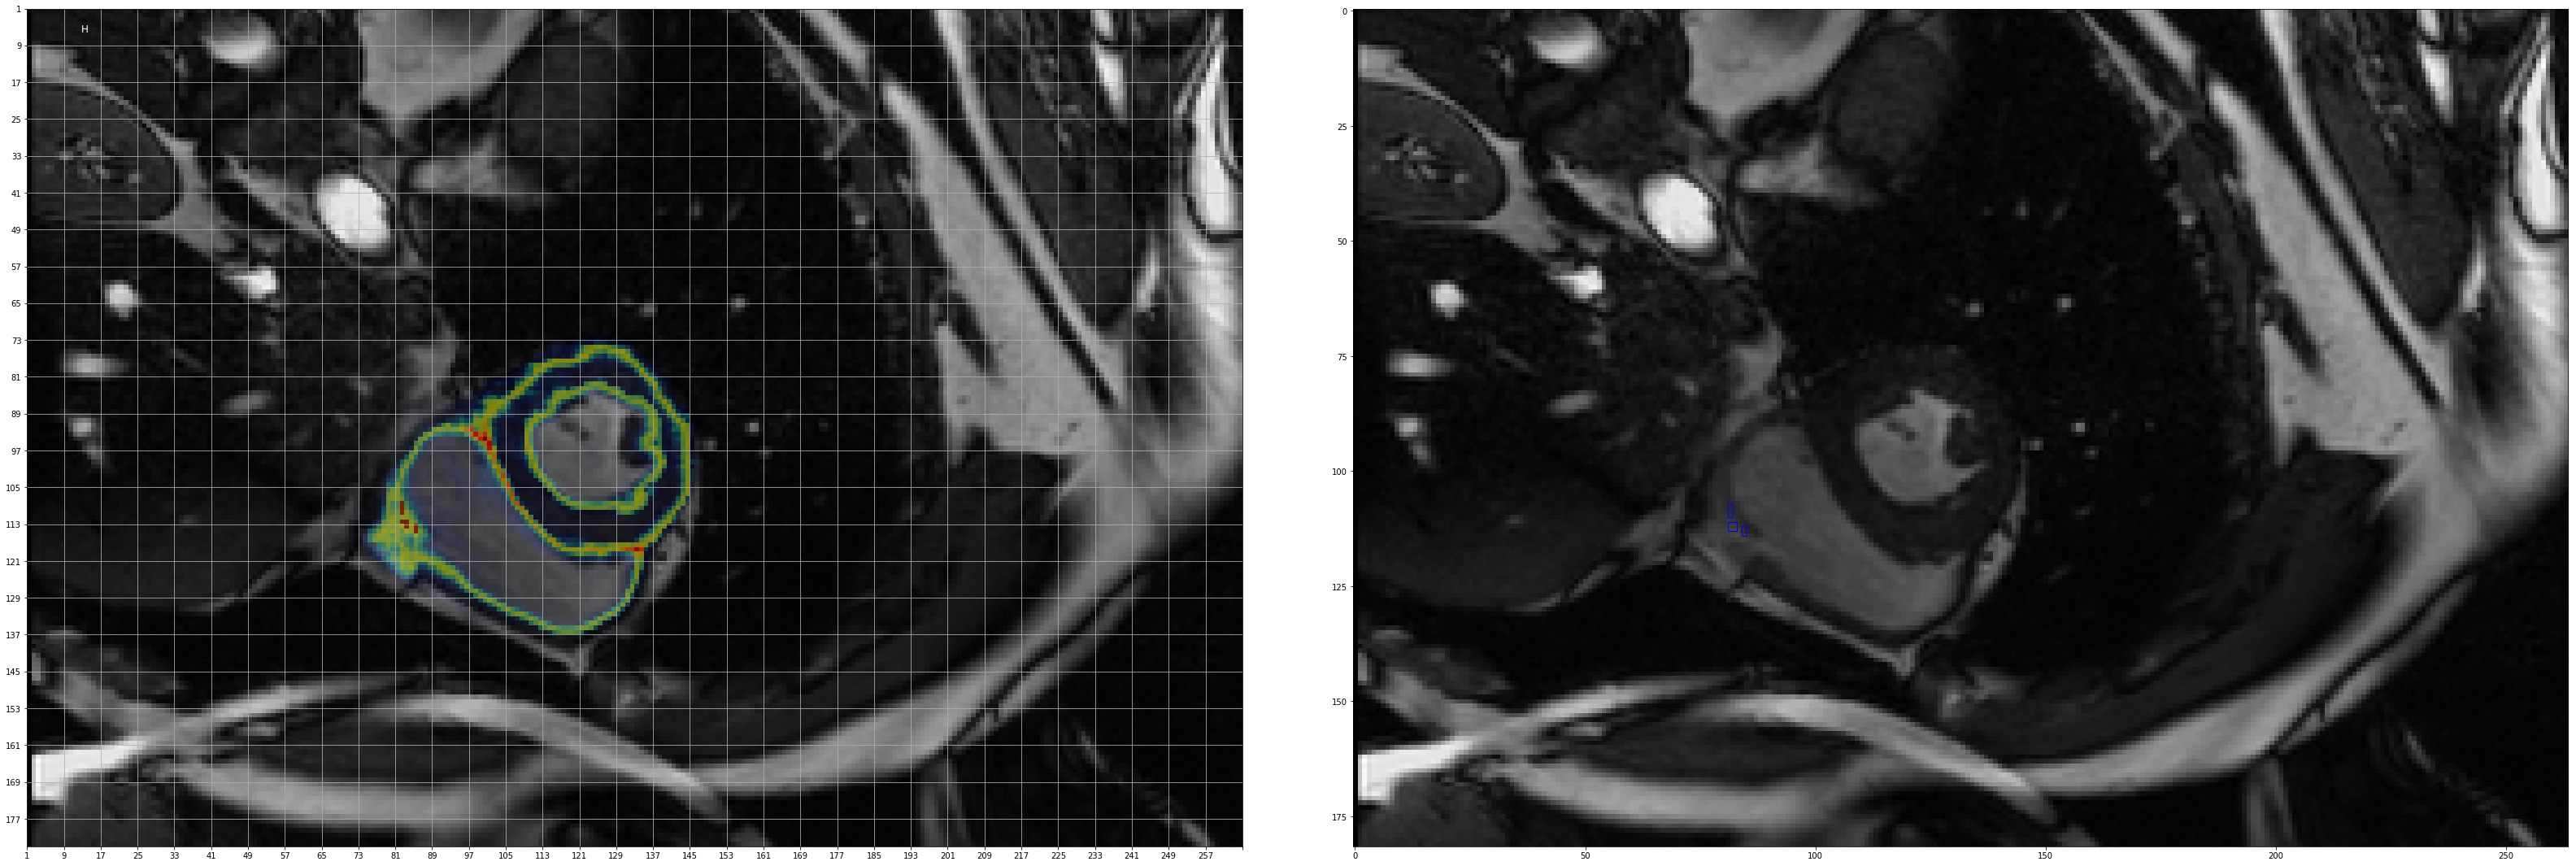

In [68]:
slice_num = 197
batch_nr = 1
image = dataset.train_images[slice_num]
label = dataset.train_labels[slice_num]
bbox = new_batch.batch_bounding_boxes[batch_nr]
bbox = BoundingBox.create(bbox)
print(bbox.box_four)
fig = plt.figure(figsize=(56, 50))

ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
w, h = image[0].shape
ax1.imshow(image[0], cmap=cm.gray)
ax1.imshow(image[1], cmap=mycmap)
ax1.imshow(label, cmap=mycmap)

ax1.grid(which='minor', color='w', linestyle='-', linewidth=4)
ax1.set_xticks(np.arange(-.5, h, 8))
ax1.set_yticks(np.arange(-.5, w, 8))
ax1.set_xticklabels(np.arange(1, h+1, 8))
ax1.set_yticklabels(np.arange(1, w+1, 8))
ax1.text(12, 4, 'H', size='large',
            ha='center', va='center', color='w')
plt.grid(True)
# ax1.add_patch(bbox.get_matplotlib_patch(color='b'))
ax2 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)
ax2.imshow(image[0], cmap=cm.gray)

for roi_idx in np.arange(dataset.train_lbl_rois[slice_num].shape[0]):
    box_four = dataset.train_lbl_rois[slice_num][roi_idx]
    roi_box = BoundingBox.create(box_four)
    ax2.add_patch(roi_box.get_matplotlib_patch(color='b'))

# ax1.imshow(center_mask, cmap=mycmap)
plt.show()

In [13]:
batch_size = 8
new_batch = BatchHandler(dataset, is_train=True, cuda=True, keep_bounding_boxes=True, verbose=False)
batch_imgs, _target_labels_per_roi = new_batch(batch_size=batch_size)
print(new_batch.current_slice_ids)

[69, 64, 48, 60, 24, 108, 37, 36]


In [20]:
target_labels = new_batch.target_labels_per_roi
# this is a dict with keys 1, 4, 8
print(np.where(target_labels[8][0] !=0 ))

(array([20, 21, 29, 30, 40, 41, 42, 47, 48, 49, 50, 51, 56, 57, 58, 59, 65,
       66, 67, 68]),)


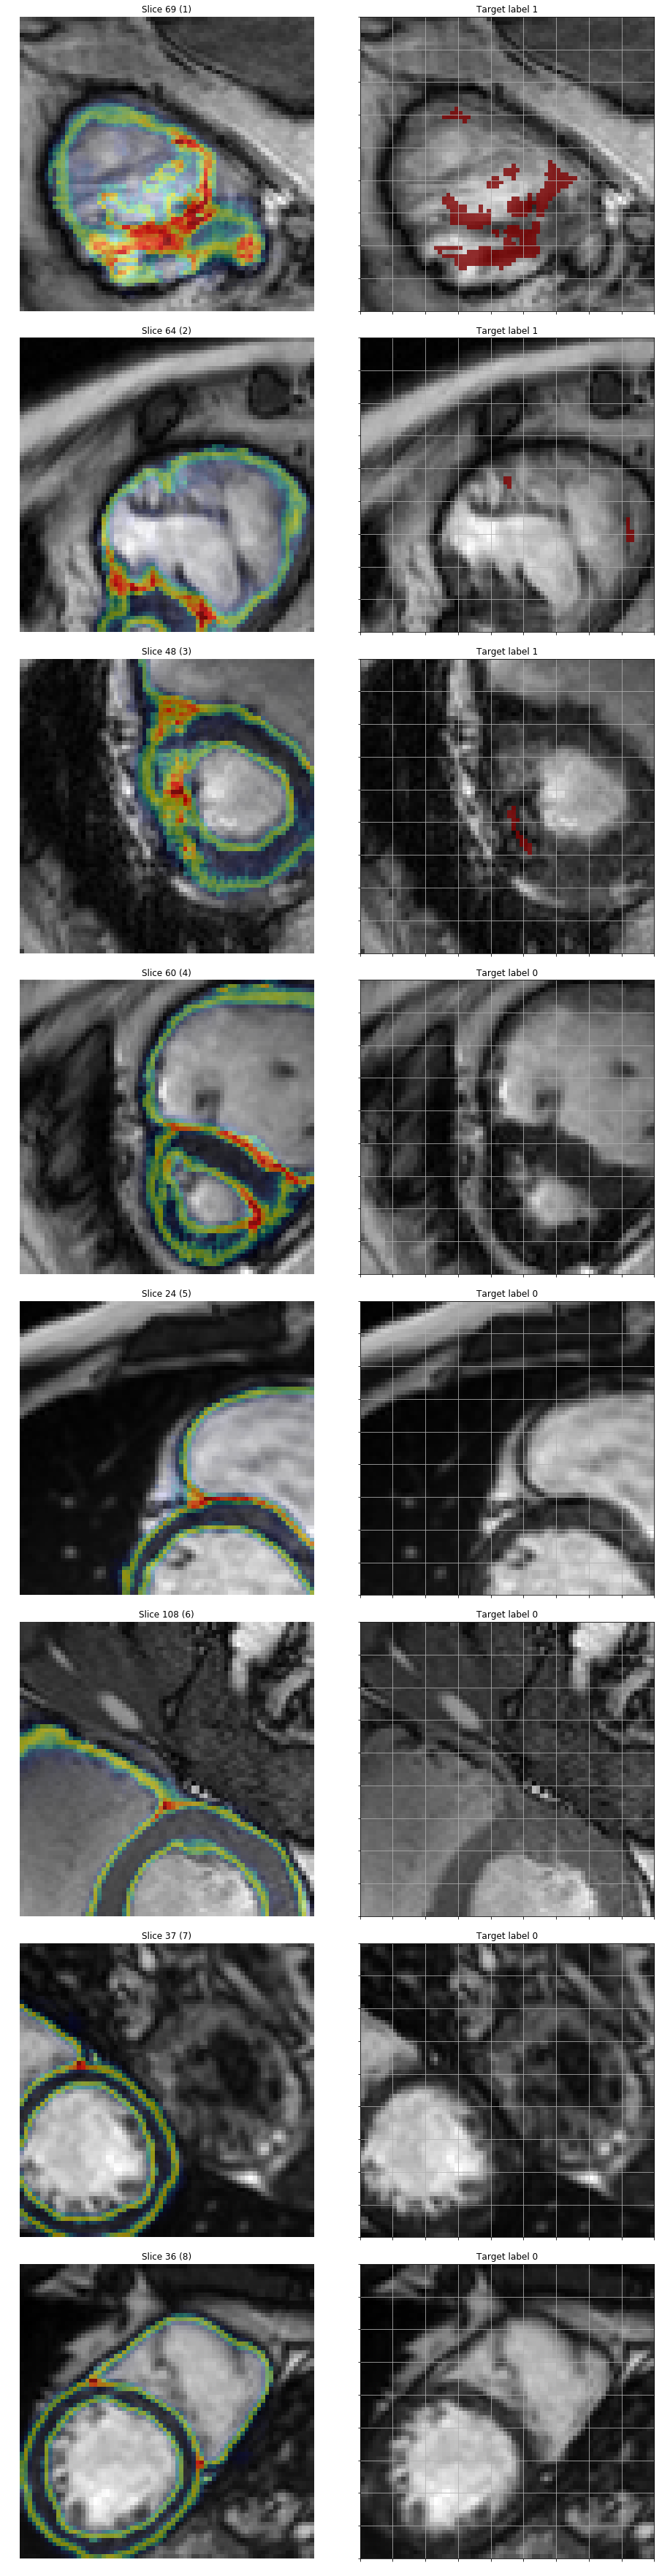

In [15]:
new_batch.visualize_batch(grid_spacing=8)

In [3]:
from common.detector.helper import create_experiment

exper_id = "20181016_11_17_43_rd2_f0p01_brier_emap_20KE_lr1e05"

exp_handler = create_experiment(exper_id)



Load experiment from /home/jorg/repository/dcnn_acdc/logs/20181016_11_17_43_rd2_f0p01_brier_emap_20KE_lr1e05/stats/exper_stats.dll


In [4]:
rd_model = exp_handler.load_checkpoint(checkpoint=20000)

Creating new model RegionDetector: rd2-detector
INFO - RegionDetector - debug - num_of_channels_last_layer 32
INFO - RegionDetector - debug - total #parameters 69956
Loading existing model with checkpoint 20000 from dir /home/jorg/repository/dcnn_acdc/logs/20181016_11_17_43_rd2_f0p01_brier_emap_20KE_lr1e05/checkpoints
